In [2]:
import networkx as nx
import json
from operator import itemgetter
%matplotlib inline

# Create DiGraph

In [3]:
d = nx.DiGraph()
dias = [
    '2022-01-31',
    '2022-02-01', 
    '2022-02-02', 
    '2022-02-03', 
    '2022-02-04',
    '2022-02-05',
    '2022-02-06',
]

for dia in dias:
    with open(f'datalake/extract_date={dia}.json') as file:
        search_tweets = json.load(file)
        retweets = []
        for tweet in search_tweets:
            retweets.append(tweet)
        for retweet in retweets:
            retweeted_status = retweet['retweeted_status']
            retweeted_sn = retweeted_status['user']['screen_name']
            retweeter_sn = retweet['user']['screen_name']
            if d.has_edge(retweeted_sn, retweeter_sn):
                d.edges[retweeted_sn, retweeter_sn]['weight'] += 1
            else:
                d.add_edge(retweeted_sn, retweeter_sn, weight = 1)

# Analyze Graph

In [4]:
# Dados mais genéricos
print(f'Quantidade de nós: {d.number_of_nodes()}')
print(f'Quantidade de arestas: {d.number_of_edges()}')
print(f'Usuário mais retweetado: {max(d.nodes, key = d.out_degree)}')

Quantidade de nós: 1035
Quantidade de arestas: 890
Usuário mais retweetado: SigaGazetaBR


In [6]:
# Top 10 usuários mais retweetados
sorted(d.out_degree(), key=itemgetter(1), reverse=True)[:10]

[('SigaGazetaBR', 189),
 ('brom_elisa', 62),
 ('forumpandlr', 56),
 ('folha', 49),
 ('ibopeenquetes', 40),
 ('jairleite096', 33),
 ('dep_padrejoao', 19),
 ('TerraBrasilnot', 19),
 ('BelaMegale', 18),
 ('moreira_uallace', 14)]

In [24]:
# Top 10 twitters com tweets mais retweetados
sorted(d.out_degree(weight="weight"), key=itemgetter(1), reverse=True)[:10]

[('SigaGazetaBR', 1013),
 ('brom_elisa', 434),
 ('ibopeenquetes', 280),
 ('JooBati47318744', 70),
 ('freu_rodrigues', 70),
 ('DestroAvante', 70),
 ('Metropoles', 70),
 ('forumpandlr', 56),
 ('folha', 49),
 ('Menino_maiki', 35)]

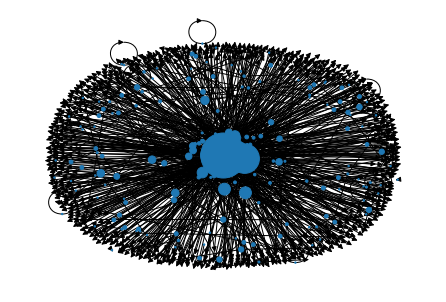

In [14]:
node_sizes = [d.out_degree(n, weight='weight') * 2 for n in d.nodes]
nx.draw(d, node_size=node_sizes)